<a href="https://colab.research.google.com/github/andreacohen7/biology/blob/main/Abalone_Sex_Classification_with_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Sex Classification with Confusion Matrix
- Andrea Cohen
- 01.05.22

## Task:
  - Using the abalone dataset, predict sex from its features using KNN. 

## Data:
  - https://archive.ics.uci.edu/ml/datasets/abalone

### Preliminary Steps

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display='diagram')

#### Import the data

In [3]:
filename = '/content/abalone.data'
df = pd.read_csv(filename, header = None)
df = df.rename(columns = {0:'Sex',
                          1:'Length',
                          2:'Diameter',
                          3:'Height',
                          4:'Whole weight',
                          5:'Shucked weight',
                          6:'Viscera weight',
                          7:'Shell weight',
                          8:'Rings'})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.shape

(4177, 9)

  - There are 4177 rows and 9 columns.

In [6]:
df.duplicated().sum()

0

  - There are 0 duplicated rows.

In [7]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

  - There are 0 missing values.

#### Determine how balanced the classes are

In [8]:
df['Sex'].value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

  - 36.58% of the observations are male
  - 32.13% of the observations are infant
  - 31.29% of the observations are female

#### Convert the string names of the classes to numeric values

In [9]:
df['Sex'] = df['Sex'].replace({'M': 0, 'I': 1, 'F': 2})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Separate the data into the features matrix (X) and target vector (y).

In [10]:
y = df['Sex']
X = df.drop(columns = ['Sex'])

#### Train-test split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
display(len(X_train))
display(len(X_test))
display(len(y_train))
display(len(y_test))

3132

1045

3132

1045

#### Scale the data using a model pipeline, fit the pipeline on the training data

In [12]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Predict the values for the test set

In [13]:
predictions = knn_pipe.predict(X_test)
predictions

array([2, 0, 0, ..., 2, 1, 1])

#### Evaluate the model's performance on the test set

In [14]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.5502392344497608

  - The accuracy of the default model is 55.02%.

#### Tune the model

In [15]:
neighbors = list(range(1, 3132, 100))
scores = pd.DataFrame(index=neighbors, columns = ['Accuracy Score'])
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn_pipe = make_pipeline(scaler, knn)
  knn_pipe.fit(X_train, y_train)
  test_pred = knn_pipe.predict(X_test)
  acc_score = knn_pipe.score(X_test, y_test)
  scores.loc[neighbor, 'Accuracy Score'] = acc_score
scores.head()

,Accuracy Score
1,0.501435
101,0.578947
201,0.556938
301,0.563636
401,0.561722


In [16]:
scores = scores.sort_values(by='Accuracy Score', ascending = False)
scores.head()

,Accuracy Score
101,0.578947
1101,0.566507
301,0.563636
401,0.561722
501,0.561722


In [17]:
neighbors = list(range(75, 125))
scores = pd.DataFrame(index=neighbors, columns = ['Accuracy Score'])
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn_pipe = make_pipeline(scaler, knn)
  knn_pipe.fit(X_train, y_train)
  test_pred = knn_pipe.predict(X_test)
  acc_score = knn_pipe.score(X_test, y_test)
  scores.loc[neighbor, 'Accuracy Score'] = acc_score
scores.head()

,Accuracy Score
75,0.573206
76,0.574163
77,0.574163
78,0.573206
79,0.580861


In [18]:
scores = scores.sort_values(by='Accuracy Score', ascending = False)
scores.head()

,Accuracy Score
117,0.583732
115,0.583732
120,0.581818
102,0.581818
124,0.580861


  - The maximum accuracy score is 58.37%, achieved using K at 117.  

In [19]:
best_n_neighbors = scores.index[0]
knn_tuned = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_pipe = make_pipeline(scaler, knn_tuned)
knn_pipe.fit(X_train, y_train)
test_pred = knn_pipe.predict(X_test)
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.583732057416268

#### Create a confusion matrix for the optimal KNN model

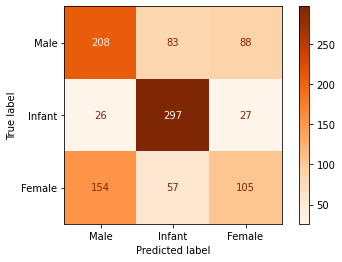

In [20]:
labels = ['Male', 'Infant', 'Female']
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels = labels, cmap = 'Oranges');

  - The tuned K-Nearest Neighbors model accurately classified 208 of the abalone as male, 297 of the abalone as infants, and 105 of the abalone as female